Малофеев Иван Васильевич 20930
Расчётное задание №2

In [ ]:
# Импортируем библиотеки
import math
import numpy as np

Изначальные данные:

In [ ]:
con = 8         # Количество концентраторов
sp = 2400       # Скорость передачи, бит/с
val = 1200      # Средняя длина пакета, бит
bw1 = 8         # Интенсивность входного потока днем (с 8 до 24 часов)
bw2 = 0.5       # Интенсивность входного потока ночью (с 0 до 8 часов)
buff = 1        # Размер буфера, пакетов

Первое задание \
Делал по вот этой формуле из самого задания: 

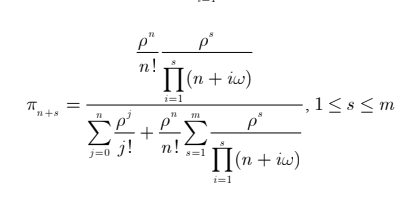

Где n - количество концентраторов, \
s, m - максимальный размер очереди, \
p - интенсивность потока днем или ночью \
i, w - в нашей задаче отсутствуют

In [ ]:
# k - Количество концентраторов
# v - Скорость передачи, бит/с
# n - Средняя длина пакета, бит
# bw - Интенсивность входного потока
# b - Размер буфера, пакетов

def task1(k, v, n, bw, b):
    # Средняя пропускная способность
    u = v / n   
    # Интенсивность нагрузки канала       
    p1 = bw / u

    # Как сказал лектор, у нас одна очередь в размере суммы буфферов каждого из
    # концентраторов и размера буффера минус один
    m = k * b + b - 1
    
    # Далее по формуле
    top = (p1 ** k / math.factorial(k)) * (p1 ** m / k ** m)

    bot1 = 0
    for j in range(0, k + 1):
        bot1 += p1 ** j / math.factorial(j)

    bot2 = 0
    for j in range(1, m + 1):
        bot2 += p1 ** j / k ** j
    bot2 *= p1 ** k / math.factorial(k)

    return top / (bot1 + bot2)

In [ ]:
# Проверка работы
print("Probability of blocking a daytime package", task1(con, sp, val, bw1, buff))
print("Probability of blocking a nighttime package", task1(con, sp, val, bw2, buff))

Probability of blocking a daytime package 0.00011533360244507237
Probability of blocking a nighttime package 2.6805634950428284e-22


Второе задание: \
Я взял код лектора и адаптировал под n концентраторов

In [ ]:
# bw - интенсивность потока
# k - количество концентраторов
# mu - пропускная способность
# m - максимальная очередь

def task2(bw, k, mu, m):
    np.random.seed(100)

    n_rep = 1
    p_refuse = 0

    n_lost = 0
    n_packets = 10000000
    for i in range(n_rep):
        t = 0
        queue = 0
        t_free = np.zeros(k)

        for f in range(n_packets):
            t += np.random.exponential(scale=1 / bw)
            n = 0
            if queue > 0:
                for j in range(k):
                    while t_free[j] < t and queue > 0:
                        t_free[j] += np.random.exponential(scale=1/mu)
                        queue -= 1
            for h in range(k):
                if t_free[h] < t:
                    t_free[h] = t + np.random.exponential(scale=1/mu)
                    break
                else:
                    n += 1
            if n == k:
                if queue < m:
                    queue += 1
                else:
                    n_lost += 1
    p_refuse += n_lost/n_packets

    p_refuse /= n_rep

    return p_refuse

In [ ]:
# Проверка кода
print("Probability of blocking a daytime package by Monte-Carlo", task2(bw1, con, sp / val, con * buff + buff - 1))
print("Probability of blocking a daytime package by Monte-Carlo", task2(bw2, con, sp / val, con * buff + buff - 1))

Третья задача: \
Просто выполнял код из первой задачи, сравнивал выдаваемое \
значение с 0.0001, если больше, то увеличить буффер на один, \
если меньше, то вывести предпочитаемое количество буфферов

In [ ]:
# k - Количество концентраторов
# v - Скорость передачи, бит/с
# n - Средняя длина пакета, бит
# bw - Интенсивность входного потока
# b - Размер буфера, пакетов

def task3(k, v, n, bw, b):
    a = 1
    while 1:
        a = task1(k, v, n, bw, b)
        if a > 0.0001:
            b += 1
        else:
            break
    print("Preferable buffer size: ", b)

In [ ]:
# Проверка кода
task3(con, sp, val, bw1, buff)